In [290]:
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
import numpy as np
import copy
import math
%matplotlib inline

In [291]:
class Bouncing_ball:
    
    acceleration=9.8
    timestep=0.6
    
    def __init__(self,v0,theta,height):
        a=Bouncing_ball.acceleration
        self.angle=theta 
        self.height=height
        self.y=height
        self.x=0
        
        self.height_crossed=height
        
        self.t_reach_top=(v0*np.sin(theta * np.pi/180))/a
        self.height_max=height+1/2*a*(self.t_reach_top)**2

        self.t_max=math.sqrt(2*self.height_max/9.8)
        self.v_max=self.t_max*9.8

        
        self.current_velocity_x=v0*np.cos(theta * np.pi/180)
        self.previous_velocity_x=v0*np.cos(theta * np.pi/180)
        self.current_velocity_y=-v0*np.sin(theta * np.pi/180)
        self.previous_velocity_y=-v0*np.sin(theta * np.pi/180)
        self.time=0
    
    def advance_step(self,timestep):
        new_velocity_y=0
        a=Bouncing_ball.acceleration
        h=timestep
        v_max=self.v_max
        
        if  self.current_velocity_y < 0  :
            new_velocity_y=self.current_velocity_y+a*h
            self.height_crossed-=self.current_velocity_y*h+0.5*a*(h)**2
        elif self.current_velocity_y > 0:
                new_velocity_y=self.current_velocity_y+a*h
                self.height_crossed-=abs(self.current_velocity_y)*h-0.5*a*(h)**2
        if self.height_crossed<0:
            self.height_crossed=0
            new_velocity_y=-v_max
            self.current_velocity_y=0
      
        self.previous_velocity_y=self.current_velocity_y
        self.current_velocity_y=new_velocity_y
        self.time+=h
        self.y=self.height_crossed
        self.x+=self.current_velocity_x*h+0.5*(a)*h**2
        
        
        return self.current_velocity_y,self.current_velocity_x,self.previous_velocity_x,self.previous_velocity_y,self.y,self.x,self.time
    
   
    

    

In [292]:
b=Bouncing_ball(v0=112,theta=55,height=20)
b.height_max,b.height_crossed,b.current_velocity_y,b.v_max
b2=Bouncing_ball(v0=12,theta=60,height=20)
#b3=Bouncing_ball(v0=112,theta=50,height=22)
#b2=Bouncing_ball(v0=100,theta=6,height=10)
#b3=Bouncing_ball(v0=80,theta=33,height=52)
print(b.height_max)

449.446445864


In [293]:
nb_of_steps=100


X=[]
Y=[]


X_train_data=np.empty([1*nb_of_steps,3])
#Y_train_data=np.empty([3*nb_of_steps,3])
Y_train_data=np.empty([1*nb_of_steps,2])

height=[]

previous_velocity_y_list=[]
previous_velocity_x_list=[]

current_velocity_y_list=[]
current_velocity_x_list=[]

projection_angles=[]

velocity_y=[]
velocity_x=[]
for i in range(nb_of_steps):
    current_velocity_y,current_velocity_x,previous_velocity_x, previous_velocity_y,y,x,time=b.advance_step(0.05)
    
    X.append(x) 
    Y.append(y)
    height.append(y)
    
    previous_velocity_y_list.append(previous_velocity_y)
    angle=180/math.pi* math.atan(previous_velocity_y/previous_velocity_x)

    
    #print(y)
    velocity_y.append(current_velocity_y)
    X_train_data[i]=[previous_velocity_y,previous_velocity_x,y]
    #X_train_data[i]=[previous_velocity_y,y]
    #print(current_velocity_y)
    Y_train_data[i]=current_velocity_y,current_velocity_x
    #Y_train_data[i]=current_velocity_y
#    
#X2=[]
#Y2=[]
#for i in range(nb_of_steps):
#    current_velocity_y2,current_velocity_x2,previous_velocity_x2,previous_velocity_y2,y2,x2,time=b2.advance_step(0.005)
#    X2.append(x2)
#    Y2.append(y2)
#    previous_velocity_y_list.append(previous_velocity_y2)
#    angle=180/math.pi* math.atan(previous_velocity_y2/previous_velocity_x2)
#
#    velocity_y.append(current_velocity_y2)
#    X_train_data[i+nb_of_steps]=[previous_velocity_y2,previous_velocity_x2,y2]
#    #X_train_data[i+nb_of_steps]=[previous_velocity_y2,y2]
#
#    Y_train_data[i+nb_of_steps]=current_velocity_y2,current_velocity_x2
#    #Y_train_data[i+nb_of_steps]=current_velocity_y2
#
    
#X3=[]
#Y3=[]
#for i in range(nb_of_steps):
#    current_velocity_y3,current_velocity_x3,previous_velocity_x3,previous_velocity_y3,y3,x3,time=b3.advance_step(0.07)
#    X3.append(x3)
#    Y3.append(y3)
#    previous_velocity_y_list.append(previous_velocity_y3)
#    angle=180/math.pi* math.atan(previous_velocity_y3/previous_velocity_x3)
#
#    velocity_y.append(current_velocity_y3)
#    #X_train_data[i+2*nb_of_steps]=[previous_velocity_y2,previous_velocity_x2,y2]
#    X_train_data[i+2*nb_of_steps]=[previous_velocity_y2,y2]
#
#    #Y_train_data[i+2*nb_of_steps]=current_velocity_y3,current_velocity_x3
#    Y_train_data[i+2*nb_of_steps]=current_velocity_y3
Y_train_data

array([[-91.25502896,  64.24056087],
       [-90.76502896,  64.24056087],
       [-90.27502896,  64.24056087],
       [-89.78502896,  64.24056087],
       [-89.29502896,  64.24056087],
       [-88.80502896,  64.24056087],
       [-88.31502896,  64.24056087],
       [-87.82502896,  64.24056087],
       [-87.33502896,  64.24056087],
       [-86.84502896,  64.24056087],
       [-86.35502896,  64.24056087],
       [-85.86502896,  64.24056087],
       [-85.37502896,  64.24056087],
       [-84.88502896,  64.24056087],
       [-84.39502896,  64.24056087],
       [-83.90502896,  64.24056087],
       [-83.41502896,  64.24056087],
       [-82.92502896,  64.24056087],
       [-82.43502896,  64.24056087],
       [-81.94502896,  64.24056087],
       [-81.45502896,  64.24056087],
       [-80.96502896,  64.24056087],
       [-80.47502896,  64.24056087],
       [-79.98502896,  64.24056087],
       [-79.49502896,  64.24056087],
       [-79.00502896,  64.24056087],
       [-78.51502896,  64.24056087],
 

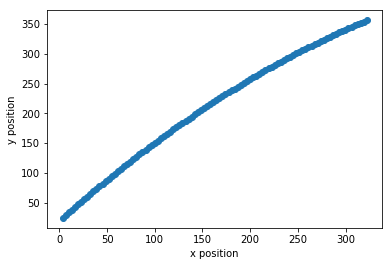

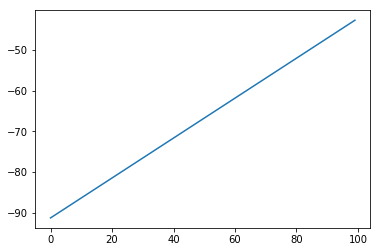

In [294]:
plt.scatter(X,Y)
#plt.scatter(X2,Y2)
#plt.scatter(X3,Y3)

plt.xlabel('x position')
plt.ylabel('y position')
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(velocity_y)
#for i in [X,Y,X2,Y2,X3,Y3]: del i
#del b,b2,b3

In [295]:
# Proceed to make a regression model based on NN.
# inputs of NN: (v_n),(height(position_y)),(theta)-> output v_n+1

import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

# Convert to pytorch tensors

X_tensor=torch.from_numpy(X_train_data).type(torch.FloatTensor)
Y_tensor=torch.from_numpy(Y_train_data).type(torch.FloatTensor)

# Convert to pytorch variables
X_variable=Variable(X_tensor,requires_grad=False)
Y_variable=Variable(Y_tensor,requires_grad=False)



# Normalize data
#mu,std=X_variable.mean(0),X_variable.std(0)
#X_variable.sub_(mu).div_(std)
#X_variable.size()
Y_variable.shape[0]

100

In [296]:
class myNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(myNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.fc2 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc3 = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))      # activation function for hidden layer
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [297]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(n_feature, n_hidden,bias=True)   # hidden layer
        self.fc2 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc2_bn=torch.nn.BatchNorm1d(n_hidden)
       
        self.fc3 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc3_bn=torch.nn.BatchNorm1d(n_hidden)
#
        self.fc4 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc4_bn=torch.nn.BatchNorm1d(n_hidden)
#
        self.fc5 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc5_bn=torch.nn.BatchNorm1d(n_hidden)
#
        self.fc6 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc6_bn=torch.nn.BatchNorm1d(n_hidden)
        
        self.fc7 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc7_bn=torch.nn.BatchNorm1d(n_hidden)
#
        self.fc8 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc8_bn=torch.nn.BatchNorm1d(n_hidden)

        self.fc9 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc9_bn=torch.nn.BatchNorm1d(n_hidden)

        
        
        self.fc10 = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        #dropout=nn.Dropout(p=0.5)

        x = F.relu(self.fc1(x))# activation function for hidden layer
        #x=dropout(x)
        
        x = F.relu(self.fc2(x))
        x=self.fc2_bn(x)
        #x=dropout(x)
        x = F.relu(self.fc3(x))
        x=self.fc3_bn(x)
        #x=dropout(x)
        x = F.relu(self.fc4(x))
        x=self.fc4_bn(x)
        #x=dropout(x)
        x = F.relu(self.fc5(x))
        x=self.fc5_bn(x)   
        
        x = F.relu(self.fc6(x))
        x=self.fc6_bn(x)
        #x=dropout(x)
        x = F.relu(self.fc7(x))
        x=self.fc7_bn(x)
        #x=dropout(x)
        x = F.relu(self.fc8(x))
        x=self.fc8_bn(x)
        #x=dropout(x)
        x = F.relu(self.fc9(x))
        x=self.fc9_bn(x)      
        
        #x=dropout(x)
        x = self.fc10(x)

        return x

In [298]:
# Set hyperparameters #
net =myNet(n_feature=3, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

myNet(
  (fc1): Linear(in_features=3, out_features=10)
  (fc2): Linear(in_features=10, out_features=10)
  (fc3): Linear(in_features=10, out_features=2)
)


In [299]:
optimizer = torch.optim.Adam(net.parameters(), lr=4e-5)
#optimizer = torch.optim.SGD(net.parameters(), lr=1e-2,momentum=0.8)
loss_func=torch.nn.MSELoss(size_average=True)  
#loss_func = torch.nn.SmoothL1Loss()

In [300]:

nb_of_epochs=6000
batch_size=10
sum_loss_list=[]

for t in range(nb_of_epochs):
    sum_loss=0

    for b in range(0,X_variable.size(0),batch_size):
        out = net(X_variable.narrow(0,b,batch_size))                 # input x and predict based on x
        loss = loss_func(out, Y_variable.narrow(0,b,batch_size))     # must be (1. nn output, 2. target), the target label is NOT one-hotted
    
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        sum_loss+=loss.data[0]
        optimizer.step()        # apply gradients

    print("Epoch :",t, "Loss:",sum_loss, "Training error :{}".format((net(X_variable)-Y_variable).pow_(2).sum().div_(Y_variable.shape[0]).data[0]))
    sum_loss_list.append(sum_loss)
  

Epoch : 0 Loss: 70399.25341796875 Training error :14056.169921875
Epoch : 1 Loss: 70147.00390625 Training error :14006.701171875
Epoch : 2 Loss: 69900.2353515625 Training error :13957.5771484375
Epoch : 3 Loss: 69655.72802734375 Training error :13908.861328125
Epoch : 4 Loss: 69413.3037109375 Training error :13860.55078125
Epoch : 5 Loss: 69172.7236328125 Training error :13812.5595703125
Epoch : 6 Loss: 68933.66357421875 Training error :13764.8701171875
Epoch : 7 Loss: 68696.1103515625 Training error :13717.48828125
Epoch : 8 Loss: 68459.92822265625 Training error :13670.3447265625
Epoch : 9 Loss: 68224.86083984375 Training error :13623.4091796875
Epoch : 10 Loss: 67990.80712890625 Training error :13576.6796875
Epoch : 11 Loss: 67757.80712890625 Training error :13530.1591796875
Epoch : 12 Loss: 67525.84130859375 Training error :13483.84375
Epoch : 13 Loss: 67294.73828125 Training error :13437.6328125
Epoch : 14 Loss: 67064.22705078125 Training error :13391.583984375
Epoch : 15 Loss: 66

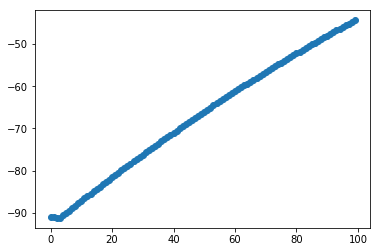

In [301]:
out=net(X_variable)
differ=out-Y_variable
differ.pow_(2).sum().div_(Y_variable.shape[0]).data[0]
plt.scatter(np.arange(0,X_variable.shape[0]),out.data[:,0].numpy())

In [302]:
##import matplotlib.pyplot as plt
##import numpy as np
## 
##x = np.linspace(0, 10*np.pi, 100)
##y = np.sin(x)
## 
##plt.ion()
##fig = plt.figure()
##ax = fig.add_subplot(111)
##line1, = ax.plot(x, y, 'b-') 
## 
##for phase in np.linspace(0, 10*np.pi, 1000):
##    
##    line1.set_ydata(np.sin(0.5 * x + phase))
##
##    fig.canvas.draw()

In [303]:
# Testing the network
b4=Bouncing_ball(v0=112,theta=55,height=20)

for i in range(1): 
    current_velocity_y4,current_velocity_x4,previous_velocity_x4, previous_velocity_y4,y4,x4,time4=b4.advance_step(0.05)
    print(current_velocity_y4)



-91.2550289604


In [304]:
#net.eval()

previous_velocity_y=previous_velocity_y4
previous_velocity_x=previous_velocity_x4
height=y4



X_test=np.array([previous_velocity_y,previous_velocity_x,height])
X_test_variable=Variable(torch.from_numpy(X_test).type(torch.FloatTensor))
out=net(X_test_variable)


out,current_velocity_y4,current_velocity_x4,y4


(Variable containing:
 -90.8953
  62.5780
 [torch.FloatTensor of size 2],
 -91.255028960367085,
 64.240560871317157,
 24.575001448018355)

In [305]:
nb_test_steps=20
velocities_y=np.empty([nb_test_steps])
velocities_x=np.empty([nb_test_steps])
y_position=np.empty([nb_test_steps])

for i in range(nb_test_steps):
    X_test=np.array([previous_velocity_y,previous_velocity_x,height])
    X_test_variable=Variable(torch.from_numpy(X_test).type(torch.FloatTensor))
    out=net(X_test_variable)
    velocities=out.data.numpy()
    velocity_y,velocity_x=velocities[0],velocities[1]
    velocity_y=velocities[0]
    if velocity_y>=0: height-=height+velocity_y*0.05
    else: height+=height+velocity_y*0.05 
    previous_velocity_y=velocity_y
    previous_velocity_x=velocity_x
    velocities_y[i]=velocity_y
    velocities_x[i]=velocity_x
    np.append(y_position,height)
    print(height)

44.6052374236
84.7307152495
165.146233508
326.309090704
649.300560176
1296.61844518
-0.583094215393
-5.02605361938
-13.5988250732
-30.2545820236
-62.9364732742
-127.541042519
-255.805198002
-511.968071413
-1024.45121975
-2049.88306875
-4101.70195351
-8207.25471992
-16422.1926178
-32859.7368179


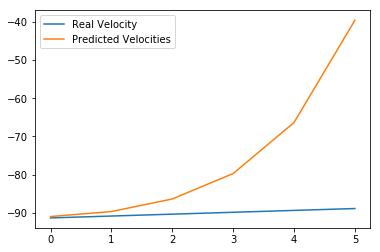

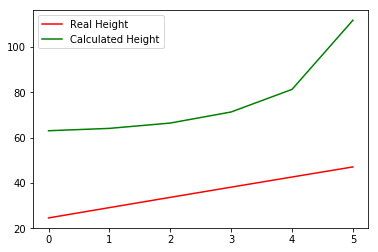

In [306]:
figure=plt.figure()
ax1=figure.add_subplot(111)
real_velocity=ax1.plot(Y_train_data[:,0][:6],label='Real Velocity')
predictions=ax1.plot(velocities_y[:6],label='Predicted Velocities')
plt.legend()


figure=plt.figure()
ax2=figure.add_subplot(111)
real_velocity=ax2.plot(X_train_data[:,2][:6],'r',label='Real Height')
predictions=ax2.plot(y_position[:6],'g',label='Calculated Height')
plt.legend()

In [307]:
X_test=np.array([previous_velocity_y,previous_velocity_x,height])
X_test_variable=Variable(torch.from_numpy(X_test).type(torch.FloatTensor))
net(X_test_variable)


Variable containing:
 -613.9114
-1430.5164
[torch.FloatTensor of size 2]

In [308]:
real_velocity_y=[]
real_velocity_x=[]

for i in range(100):
    current_velocity_y4,current_velocity_x4,previous_velocity_x4, previous_velocity_y4,y4,x4,time4=b4.advance_step(0.5)
    real_velocity_y.append(current_velocity_y4)   
    real_velocity_x.append(current_velocity_x4)
    

array([ -90.89530945,  -89.59519196,  -86.30393982,  -79.66752625,
        -66.35242462,  -39.65350342,   11.66188431,  -77.19730377,
        -70.93435669,  -61.13863754,  -48.54618454,  -33.3619194 ,
        -14.46225929,   -7.15350819,  -10.30153847,  -19.61258507,
        -38.71632004,  -77.01625824, -153.66355896, -307.03164673])

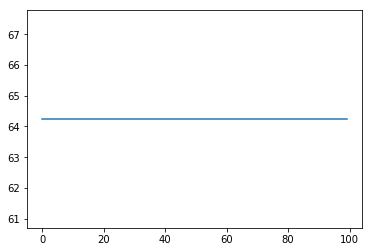

In [309]:
plt.plot(real_velocity_x)
velocities_y

In [310]:
plt.plot(X_train_data[:,2])
plt.plot(y_position

SyntaxError: unexpected EOF while parsing (<ipython-input-310-67247a250eb9>, line 2)

In [ ]:
print(y_position)